In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from sklearn.model_selection import TimeSeriesSplit 

plt.rc('figure', figsize=(10, 5))

In [2]:
germany = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

In [3]:
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
store_df = pd.read_csv('ts_superstore.csv')

In [5]:
store_df.head()

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [6]:
store_df.sale_date = store_df.sale_date.str.replace(' 00:00:00 GMT', '')

In [7]:
store_df.sale_date = pd.to_datetime(store_df.sale_date, format='%a, %d %b %Y')

In [8]:
store_df=store_df.set_index('sale_date')

In [9]:
store_df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,
2013-01-01,0,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,1,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-03,2,1,14.0,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-04,3,1,13.0,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-05,4,1,10.0,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [10]:
store_df.drop(columns='Unnamed: 0', inplace=True)

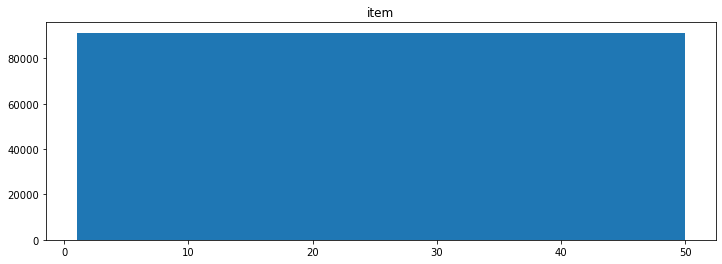

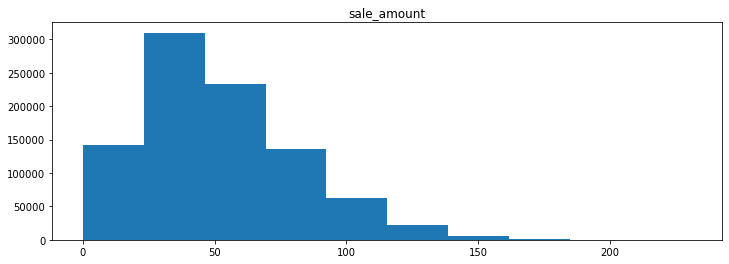

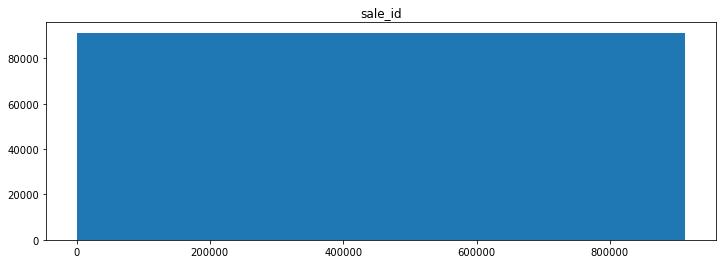

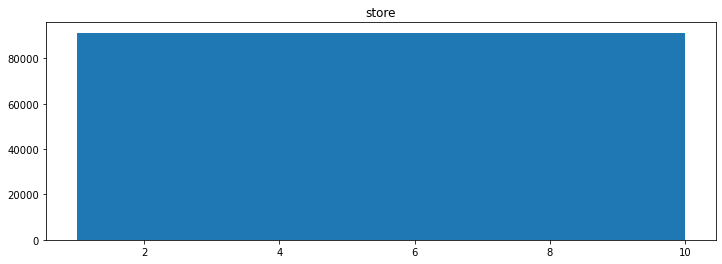

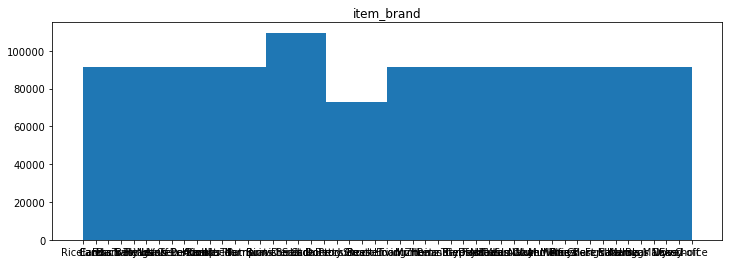

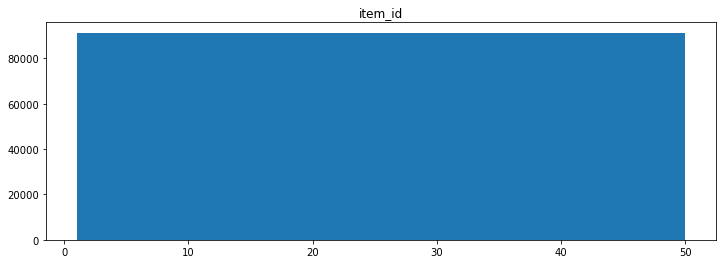

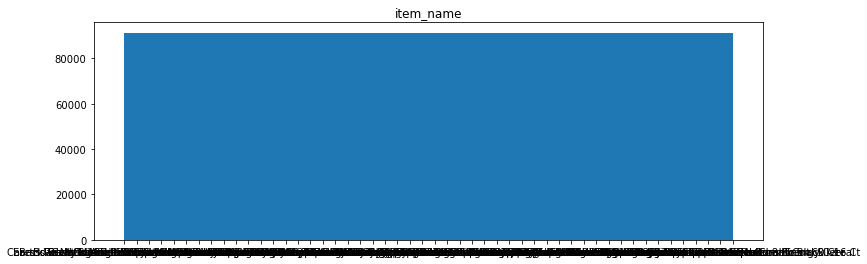

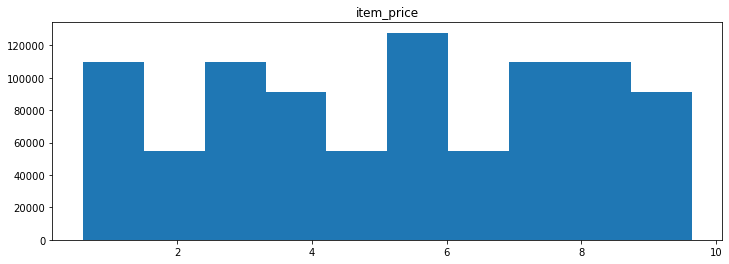

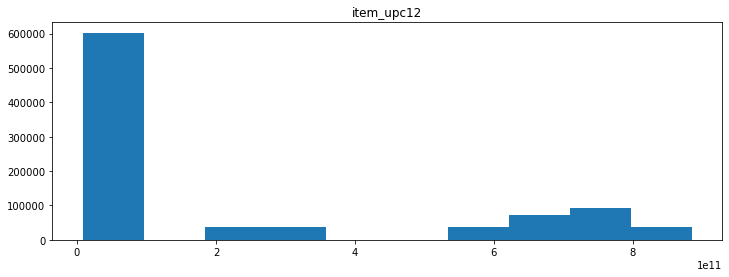

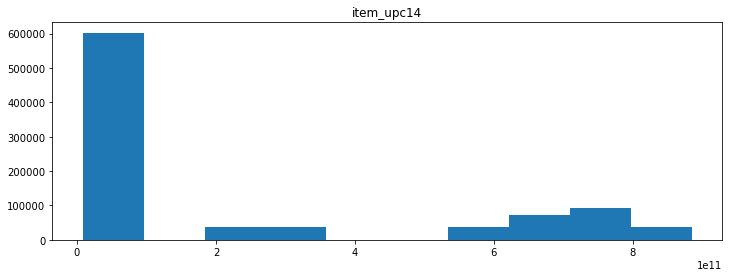

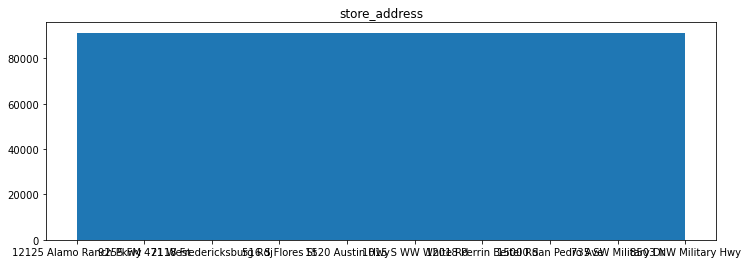

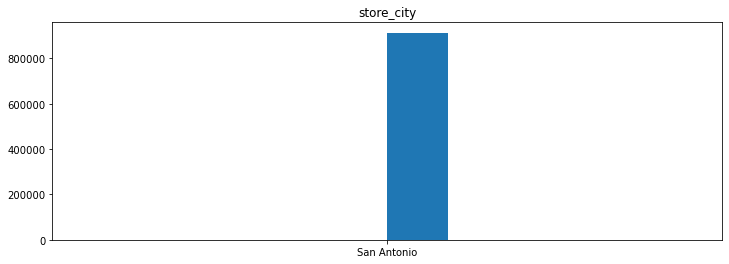

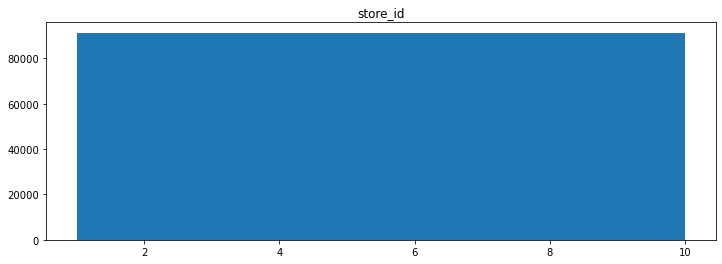

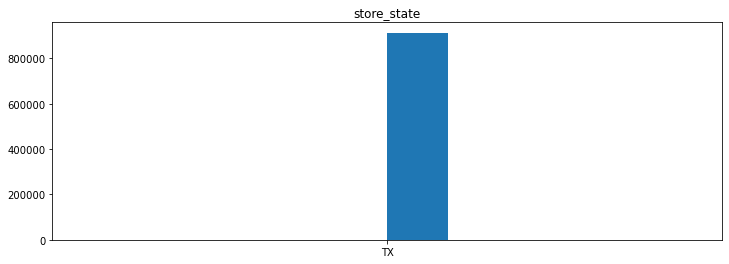

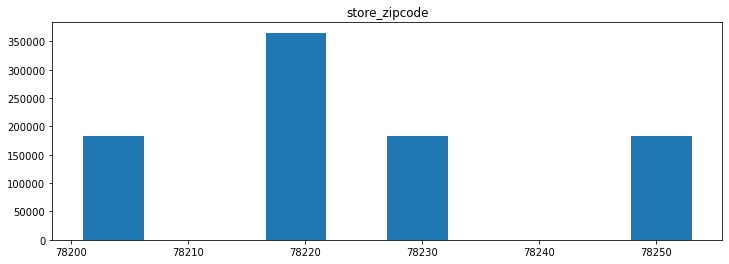

In [11]:
for col in store_df.columns:
    plt.figure(figsize=(12, 4))
    plt.hist(store_df[col])
    plt.title(col)
    plt.show()

In [12]:
store_df.item_brand.value_counts()

Usda Produce              36520
Elmers                    18260
Deerfields Gluten Free    18260
Petmate                   18260
Morton                    18260
Honest Tea                18260
Ducal                     18260
Scotch                    18260
Kelloggs                  18260
Halls                     18260
Twinings Of London        18260
Sundown Naturals          18260
Riceland                  18260
Hood                      18260
Earths Best               18260
Nakano                    18260
Pamprin                   18260
Natures Way               18260
Amys                      18260
Smart Living              18260
Caress                    18260
Choice                    18260
Back To Nature            18260
Ferrara                   18260
Bear Naked                18260
Barefoot                  18260
Heinz                     18260
Ahold                     18260
Munchies                  18260
Lea & Perrins             18260
Van De Kamps              18260
Mueller 

In [13]:
halls_df=store_df[store_df.item_brand== "Halls"]

In [14]:
halls_df.head()


,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,34,23.0,602581,1,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,34,6.0,602582,1,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-03,34,15.0,602583,1,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-04,34,13.0,602584,1,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-05,34,15.0,602585,1,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [15]:
halls_df.shape

(18260, 15)

In [16]:
halls_df.item_name.value_counts()

Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct    18260
Name: item_name, dtype: int64

In [17]:
cough_drop_df = halls_df[["sale_amount"]]

In [18]:
cough_drop_df.head()

,sale_amount
sale_date,
2013-01-01,23.0
2013-01-02,6.0
2013-01-03,15.0
2013-01-04,13.0
2013-01-05,15.0


<AxesSubplot:xlabel='sale_date'>

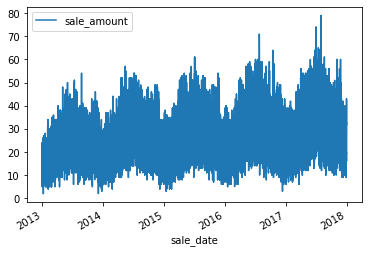

In [19]:
cough_drop_df.plot()

In [20]:
train = cough_drop_df.loc[:'2016'].copy()
test = cough_drop_df.loc["2017"].copy()

In [21]:
train.shape

(14610, 1)

In [22]:
test.shape

(3650, 1)

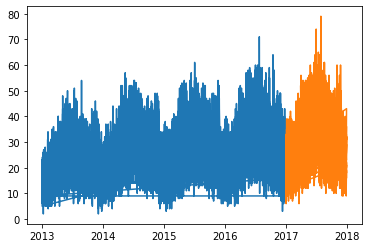

In [23]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.show()

In [24]:
y=train.sale_amount
y.head()

sale_date
2013-01-01    23.0
2013-01-02     6.0
2013-01-03    15.0
2013-01-04    13.0
2013-01-05    15.0
Name: sale_amount, dtype: float64

In [25]:
def for_all_time(target,train):
    #target distribution
    train[target].plot.hist()
    plt.title(f"distribution of {target}")
    plt.show()

    #mean of target by month
    train.groupby(train.index.month)[target].mean()\
    .plot.bar().tick_params('x', rotation=0)
    plt.title(f"Mean {target} by Month")
    plt.show()

    #assign day of week to a new column
    train['weekday'] = train.index.day_name()
    train["day_num"]=train.index.day_of_week

    #mean of target by day of week
    train.groupby(train.index.day_name())[target].mean()\
    .plot.bar().tick_params('x', rotation=45)
    plt.title(f"Mean {target} by Day of Week")
    plt.show()     
    
    #target over time
    train[target].plot()
    plt.title(f"{target} over time")
    plt.show()

    #target average over various time periods
    train[target].plot(alpha=0.2, label='Hourly')
    train[target].resample('D').mean().plot(alpha=0.5, label='Daily')
    train[target].resample('W').mean().plot(alpha=0.8, label='Weekly')
    train[target].resample('M').mean().plot(alpha=0.9, label='Monthly')
    train[target].resample('Y').mean().plot(label='Yearly')
    plt.title(f"{target} over time")
    plt.legend()
    plt.show()

    #target change over time
    train[target].resample('W').mean().diff().plot(title=f"weekly mean change in {target}")
    plt.show()
    train[target].resample('M').mean().diff().plot(title=f"monthly mean change in {target}")
    plt.show()

    #seasonal plot
    '''train[target].groupby([y.index.year, y.index.month]).mean()[:6]
    train[target].groupby([y.index.year, y.index.month]).mean().unstack()'''
    train[target].groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
    plt.title(f"Seasonal Plot of {target}")
    plt.show()

    # make my pivot table of years to month with unstack()
    table = train[target].groupby([y.index.year, y.index.month]).mean().unstack()
    table
    # unpacking my figure and axes elements
    fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

    # for ax, (month, subset) 
    for ax, (month, subset) in zip(axs, table.iteritems()):
        subset.plot(ax=ax, title=month)
        ax.hlines(subset.mean(), * ax.get_xlim(), color='black', ls='--')
        ax.set(xlabel='')
        ax.tick_params('x', rotation=30)
    
    fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
    fig.tight_layout()
    fig.subplots_adjust(wspace=0)

    #lag plot
    train['y(t + 1)'] = train[target].shift(-1)
    train.head()
    train.plot.scatter(x=f'{target}', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
    plt.title('daily lag')
    plt.show()

    weekly = train.resample('W').mean().drop(columns='y(t + 1)')
    weekly['the_next_week'] = weekly[target].shift(-1)
    weekly = weekly.rename(columns={f'{target}': 'this_week'})
    weekly.plot.scatter(x='this_week', y='the_next_week')
    plt.title('weekly lag')
    plt.show()

    weekly  = train.resample('W').mean().drop(columns='y(t + 1)')
    weekly['12_weeks_out'] = weekly[target].shift(-12)
    weekly = weekly.rename(columns={f'{target}': 'this_week'})
    weekly.plot.scatter(x='this_week', y='12_weeks_out')
    plt.title('lag over 12 weeks')
    plt.show()

    
    #autocorrelation plot
    pd.plotting.autocorrelation_plot(train[target].resample('W').mean())
    plt.show()

    #seasonal decomposition
''' j=train[target].resample('W').mean()
    result = sm.tsa.seasonal_decompose(train[target])

    decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot()'''

    


" j=train[target].resample('W').mean()\n    result = sm.tsa.seasonal_decompose(train[target])\n\n    decomposition = pd.DataFrame({\n    'y': result.observed,\n    'trend': result.trend,\n    'seasonal': result.seasonal,\n    'resid': result.resid\n    })\n\n    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()\n    decomposition[['trend_centered', 'seasonal', 'resid']].plot()"

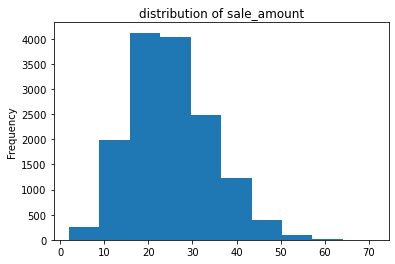

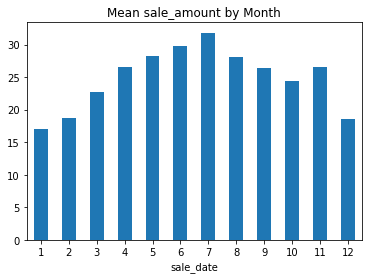

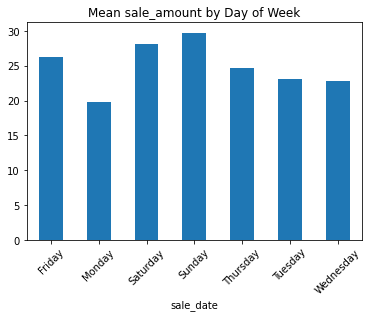

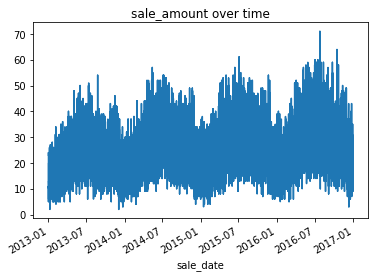

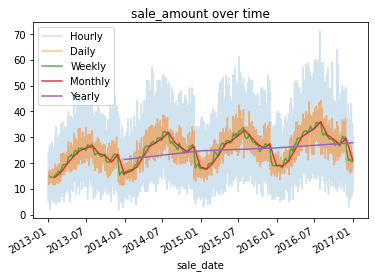

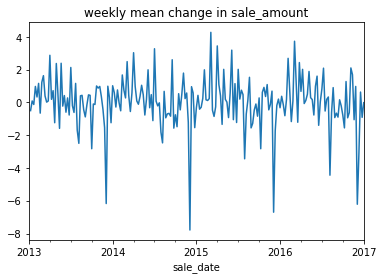

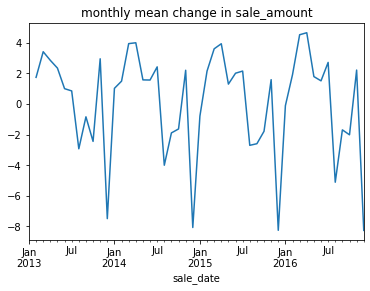

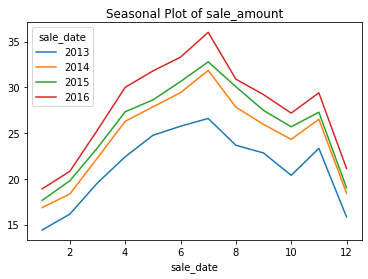

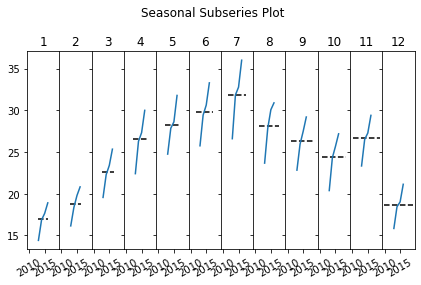

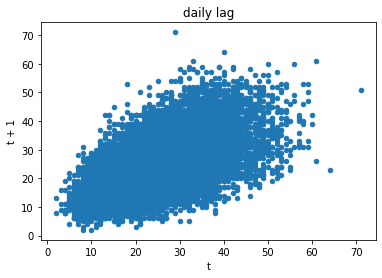

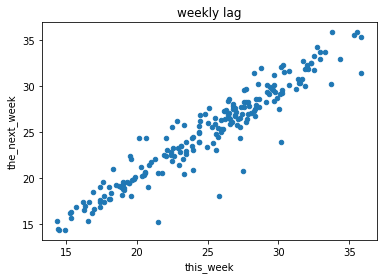

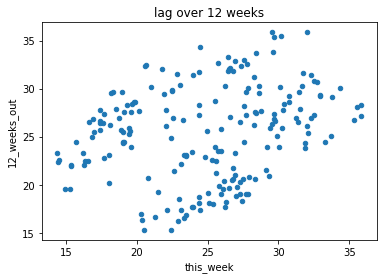

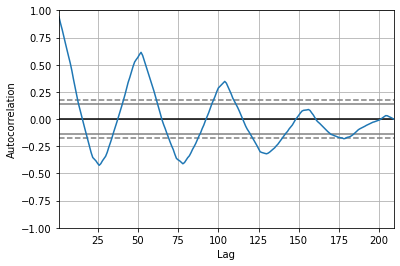

In [26]:
for_all_time("sale_amount",train)

In [27]:
germany.Date = pd.to_datetime(germany.Date)
germany = germany.set_index('Date').sort_index()



In [28]:
#creates a column for each time unit from the index
germany["month"] = germany.index.month_name()
germany["year"] = germany.index.year

In [29]:
#replace all NaNs with 0
germany = germany.fillna(0)

In [30]:
germany.head()  

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


<AxesSubplot:xlabel='Date'>

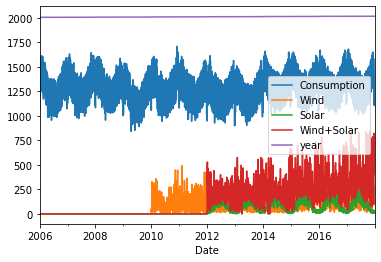

In [31]:
germany.plot()  

In [32]:
germany_wind = germany[["Wind"]]

In [33]:
germany_wind.head()

,Wind
Date,
2006-01-01,0.0
2006-01-02,0.0
2006-01-03,0.0
2006-01-04,0.0
2006-01-05,0.0


<AxesSubplot:xlabel='Date'>

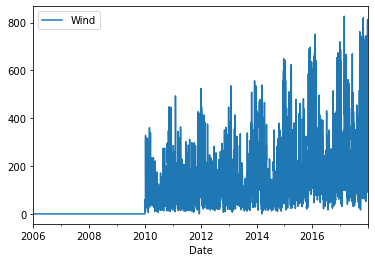

In [34]:
germany_wind.plot() 

In [35]:
train = germany_wind.loc[:'2016'].copy()
test = germany_wind.loc["2017"].copy()



In [36]:
train.head()

,Wind
Date,
2006-01-01,0.0
2006-01-02,0.0
2006-01-03,0.0
2006-01-04,0.0
2006-01-05,0.0


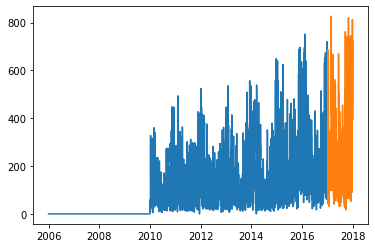

In [37]:
plt.plot(train.index, train.Wind)
plt.plot(test.index, test.Wind)
plt.show()

In [38]:
y=train.Wind
y.head()

Date
2006-01-01    0.0
2006-01-02    0.0
2006-01-03    0.0
2006-01-04    0.0
2006-01-05    0.0
Name: Wind, dtype: float64

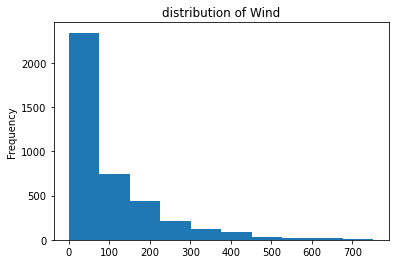

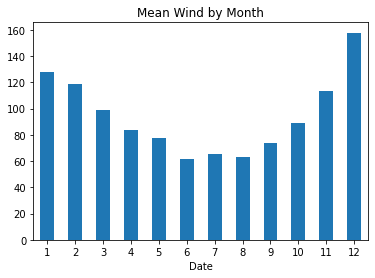

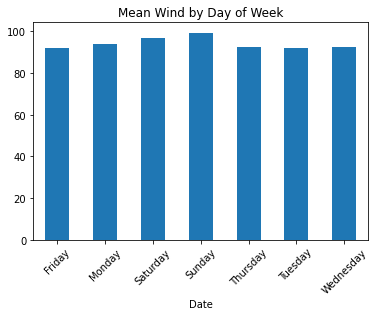

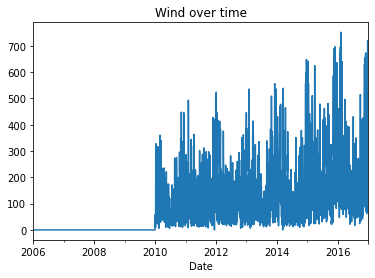

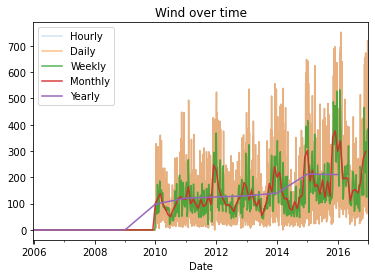

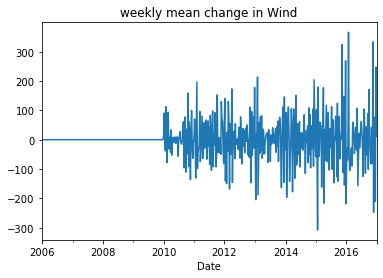

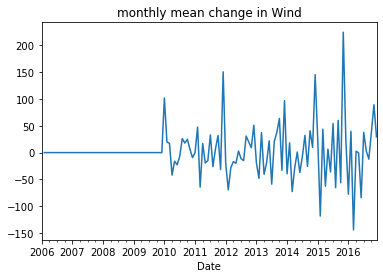

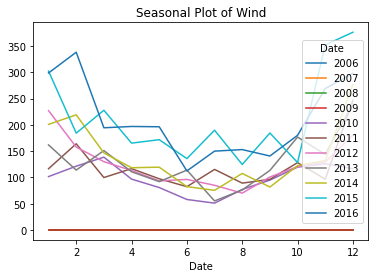

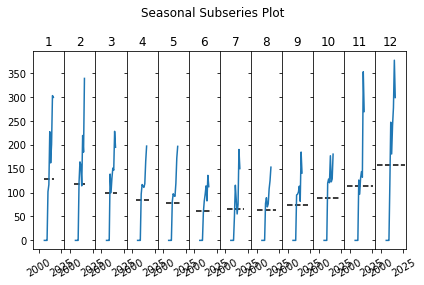

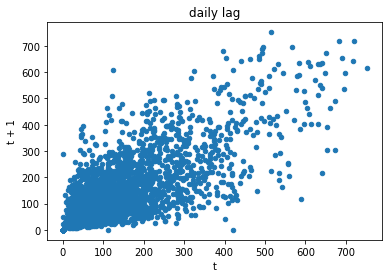

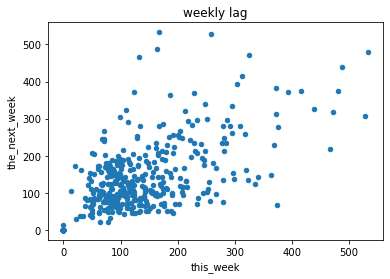

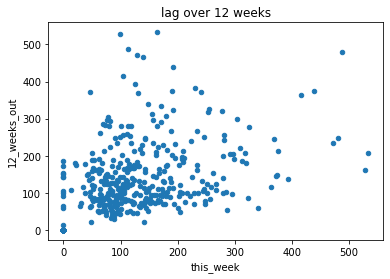

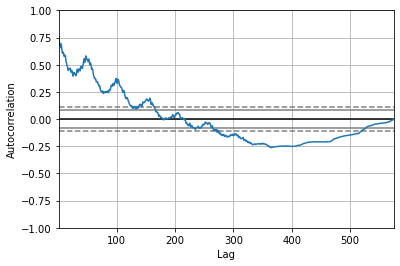

In [39]:
for_all_time("Wind",train)

In [40]:
train = germany[:'2016'].copy()
test = germany["2017"].copy()


In [47]:
y=train[["Consumption","Wind","Solar","Wind+Solar"]]
y.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


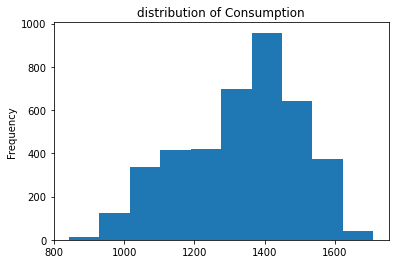

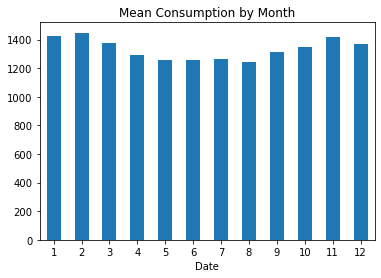

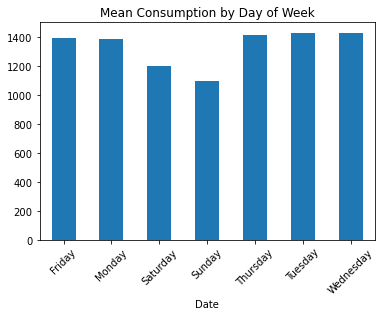

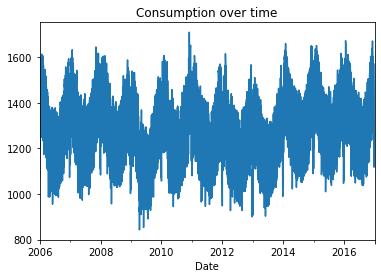

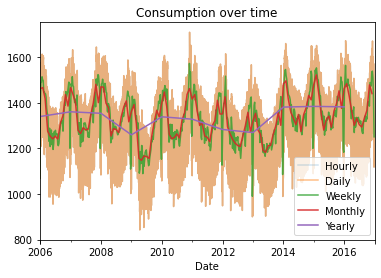

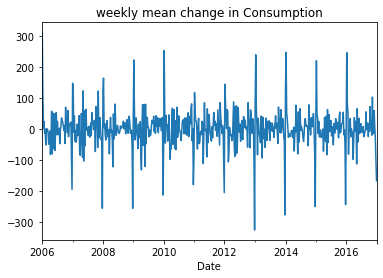

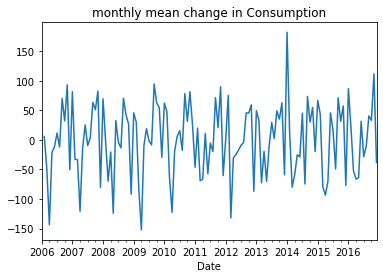

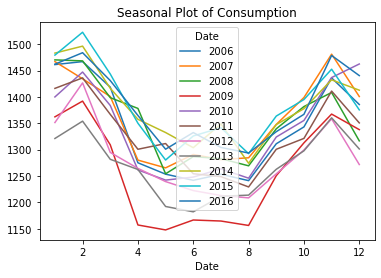

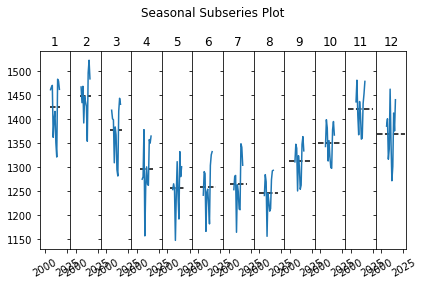

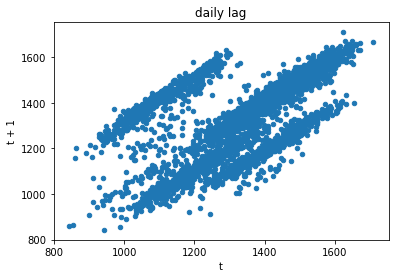

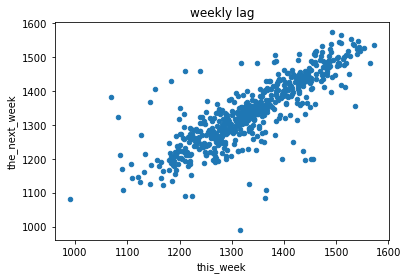

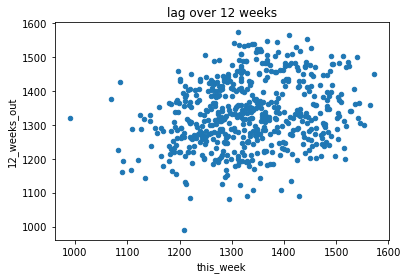

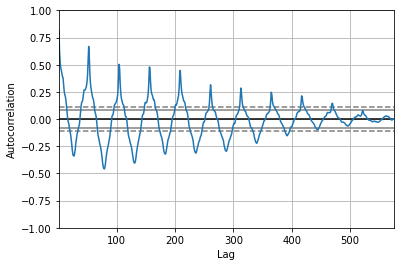

In [51]:
for_all_time("Consumption",train)